In [1]:
import pandas as pd

# Cargar el dataframe limpio desde el archivo CSV
df = pd.read_csv('../data/csv_limpieza_datos.csv')

# Ver las primeras filas para asegurarte de que el dataframe se ha cargado correctamente
print(df.head())

    age  overall_rating  potential  height  weight   foot  best_overall  \
0  34.0            78.0       78.0     182      76  Right            77   
1  19.0            65.0       81.0     174      65   Left            67   
2  17.0            62.0       80.0     178      72  Right            65   
3  18.0            77.0       88.0     175      70   Left            79   
4  26.0            74.0       75.0     168      69   Left            75   

  best_position  growth       value  ...  gk_reflexes  base_stats  \
0           CAM       0   4100000.0  ...         14.0       377.0   
1           CAM      16   1800000.0  ...          8.0       351.0   
2           CAM      18   1000000.0  ...          8.0       353.0   
3           CAM      11  22000000.0  ...         10.0       405.0   
4            ST       1   5000000.0  ...         12.0       409.0   

   international_reputation  defending_pace    player_name  position  \
0                       3.0              28     Ronaldinho   C

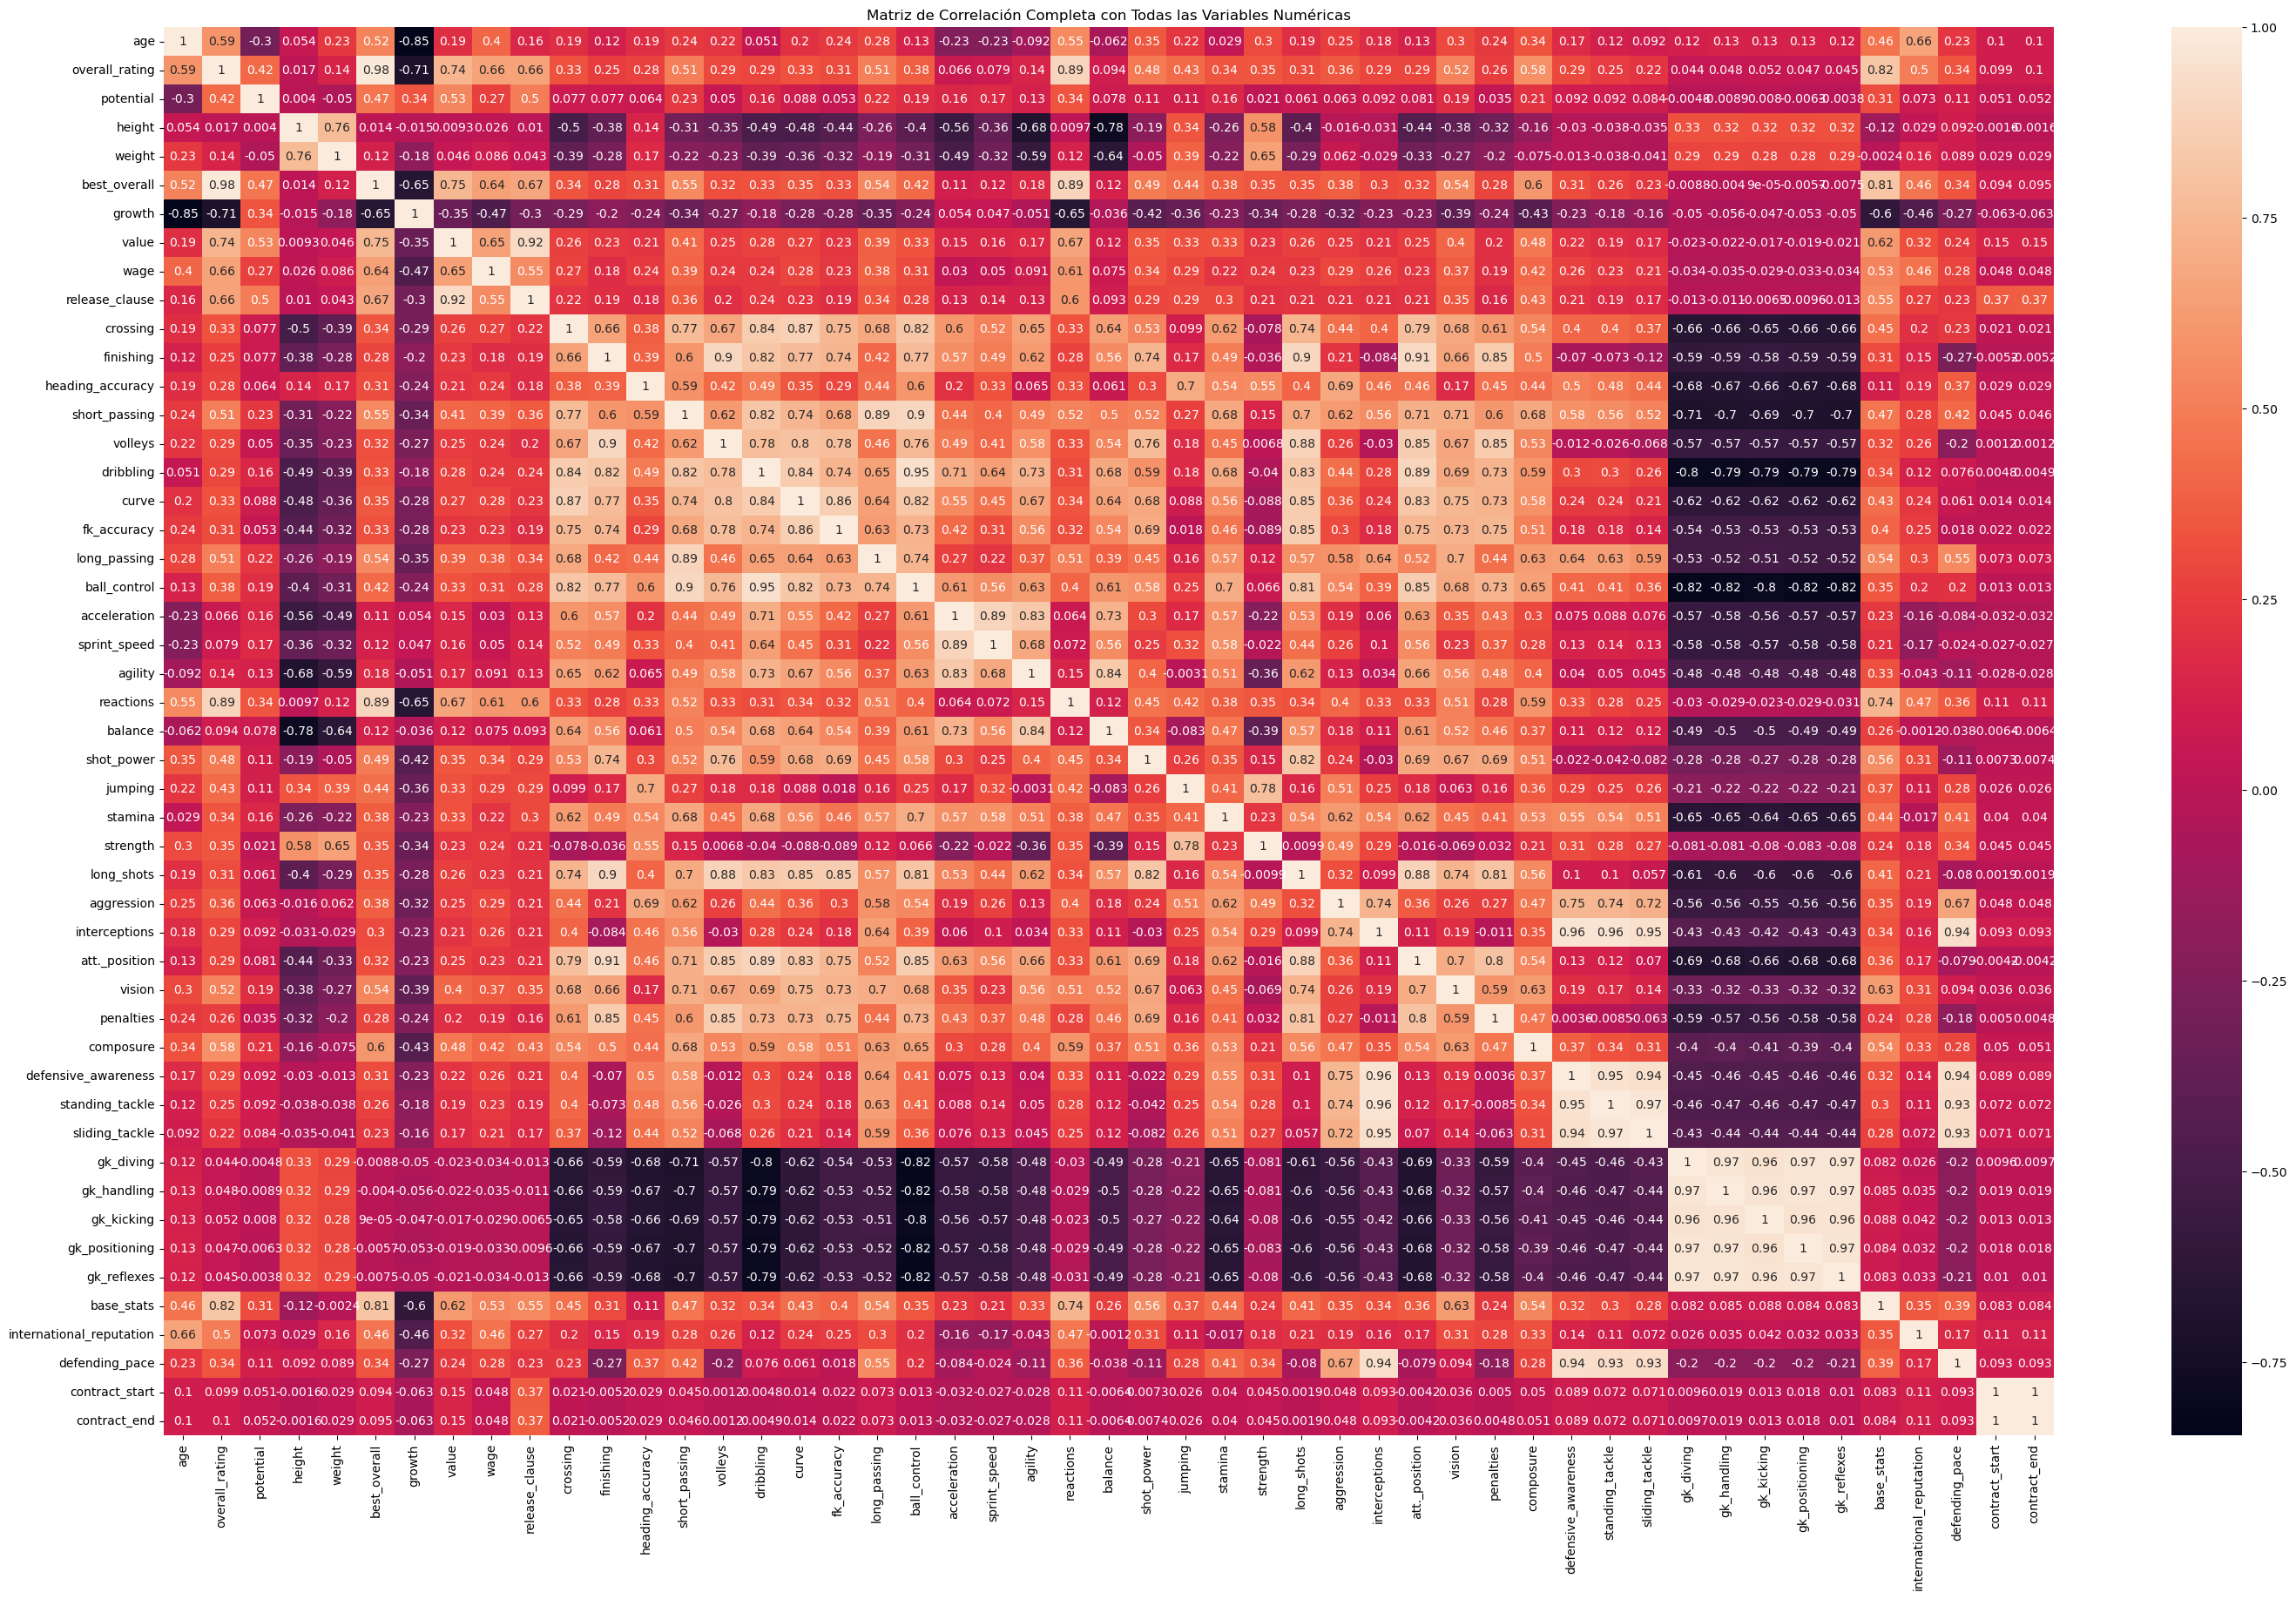

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Seleccionar solo columnas numéricas para la correlación
df_correlacion = df.select_dtypes(include=[np.number])

correlation_matrix_filtrada = df_correlacion.corr()

#Graficar la matriz de correlación con todas las variables numéricas
plt.figure(figsize=(35,21))
sns.heatmap(correlation_matrix_filtrada, annot=True)
plt.title("Matriz de Correlación Completa con Todas las Variables Numéricas")
plt.show()

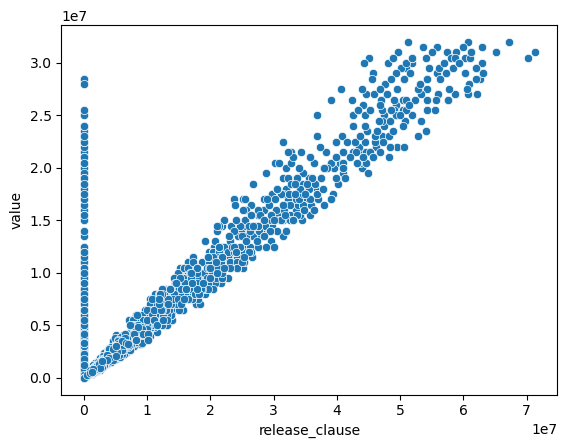

In [3]:
sns.scatterplot(x='release_clause',y='value',data=df)
plt.show()

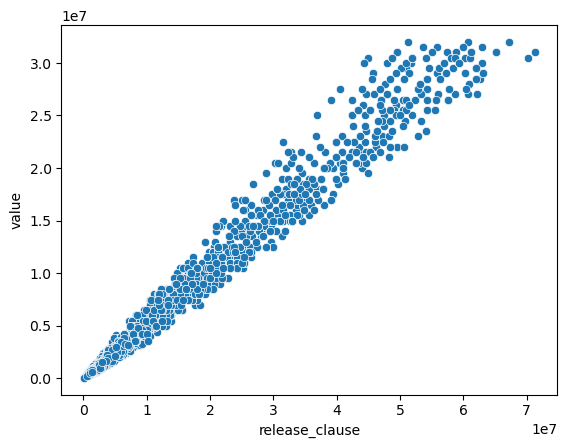

In [4]:
df_clausula0 = df[df['release_clause'] > 0]
sns.scatterplot(x='release_clause',y='value',data=df_clausula0)
plt.show()

In [5]:
# Filtrar los jugadores con releaseClause igual a 0
jugadores_clausula_0 = df[df['wage'] == 0]

# Obtener los valores únicos de contract_start para estos jugadores
valores_contract_start = jugadores_clausula_0['contract_start'].unique()

# Mostrar los valores únicos de contract_start
print(valores_contract_start)


[   0 2009 2010 2007]


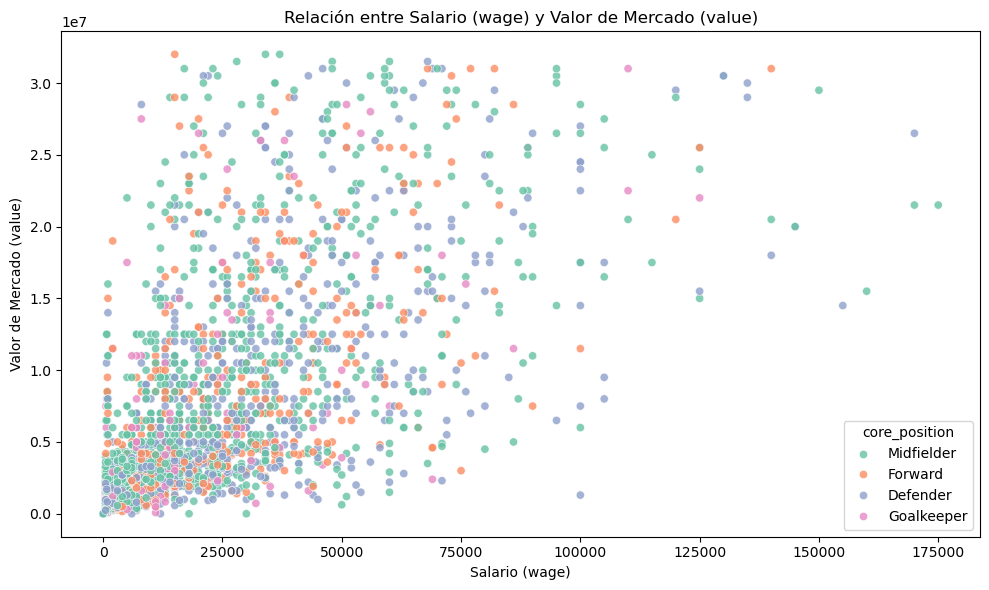

In [6]:
# Crear un gráfico de dispersión entre 'value' y 'wage'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='wage', y='value', hue='core_position', palette='Set2', alpha=0.8)

# Título y etiquetas del gráfico
plt.title('Relación entre Salario (wage) y Valor de Mercado (value)')
plt.xlabel('Salario (wage)')
plt.ylabel('Valor de Mercado (value)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [7]:
# Agrupar por reputación internacional y calcular medias
tabla_resumen = df.groupby('international_reputation')[['wage', 'value']].mean().round(2)

# Mostrar la tabla
print(tabla_resumen)

                              wage        value
international_reputation                       
1.0                       16353.06   5806875.65
2.0                       43139.18  12955515.46
3.0                       48790.96  12758926.55
4.0                       49225.00   9901250.00
5.0                       30250.00   8000000.00


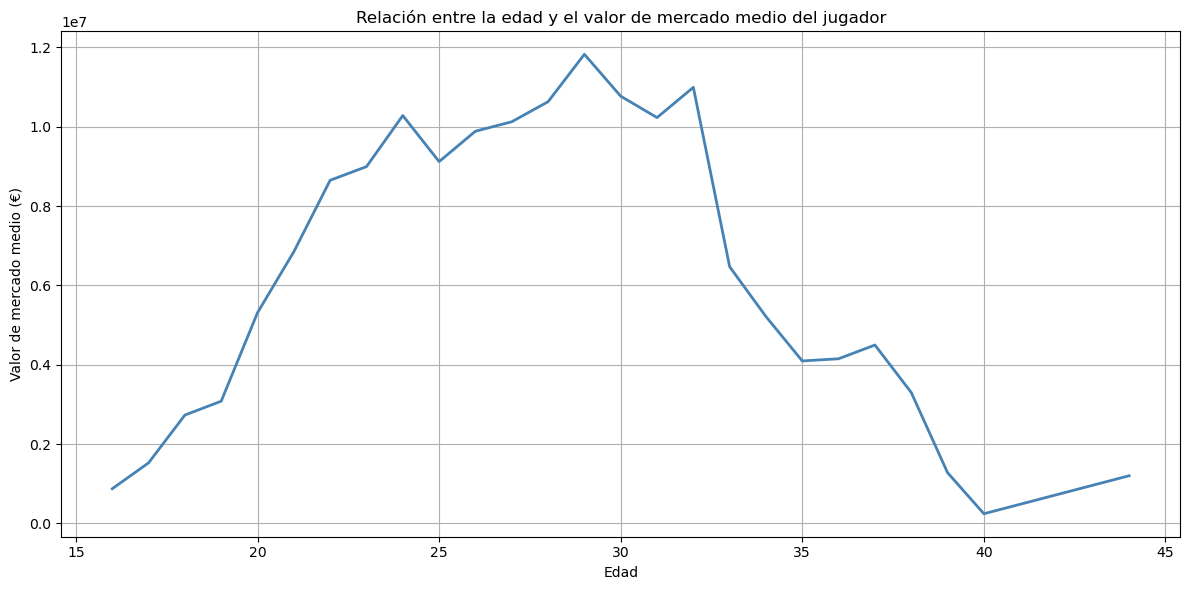

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por edad y calcular la media del valor de mercado
df_edad_valor = df.groupby('age')['value'].mean().round(2).reset_index()

# Crear gráfico de línea
plt.figure(figsize=(12,6))
plt.plot(df_edad_valor['age'], df_edad_valor['value'], color='steelblue', linewidth=2)
plt.title('Relación entre la edad y el valor de mercado medio del jugador')
plt.xlabel('Edad')
plt.ylabel('Valor de mercado medio (€)')
plt.grid(True)
plt.tight_layout()
plt.show()


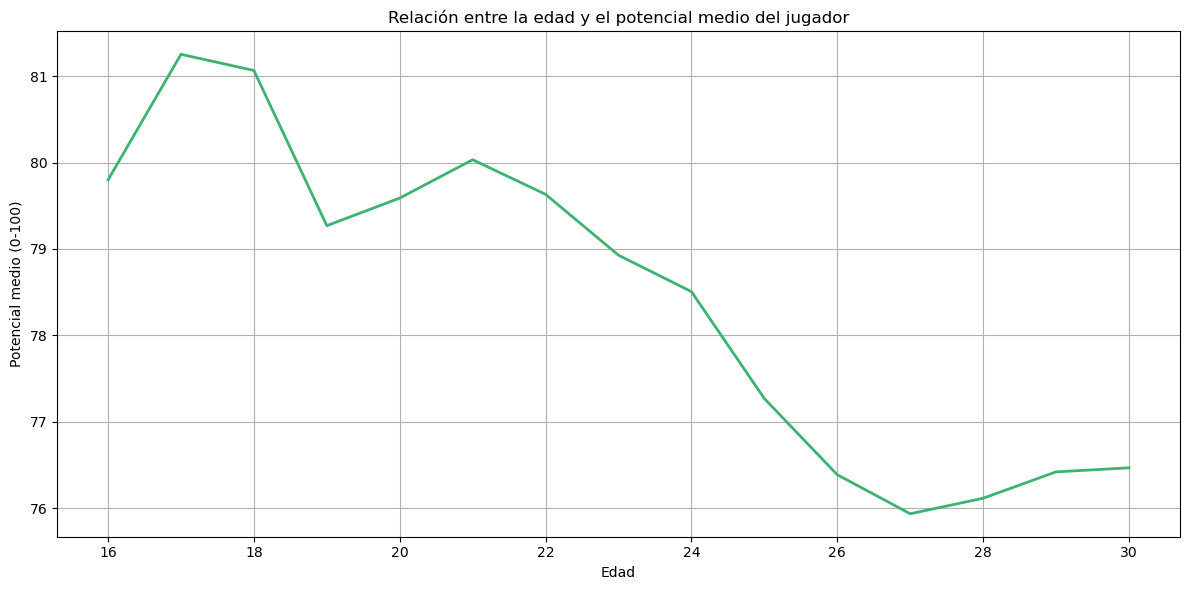

In [9]:
# Filtrar edades entre 16 y 35 años para evitar distorsiones
df_filtrado = df[(df['age'] >= 16) & (df['age'] <= 30)]

# Calcular media de potencial por edad
df_edad_potential = df_filtrado.groupby('age')['potential'].mean().reset_index()

# Gráfico
plt.figure(figsize=(12,6))
plt.plot(df_edad_potential['age'], df_edad_potential['potential'], color='mediumseagreen', linewidth=2)
plt.title('Relación entre la edad y el potencial medio del jugador')
plt.xlabel('Edad')
plt.ylabel('Potencial medio (0-100)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\javie\AppData\Local\Temp\ipykernel_5684\2933410932.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_counts.index, y=position_counts.values, palette="viridis")


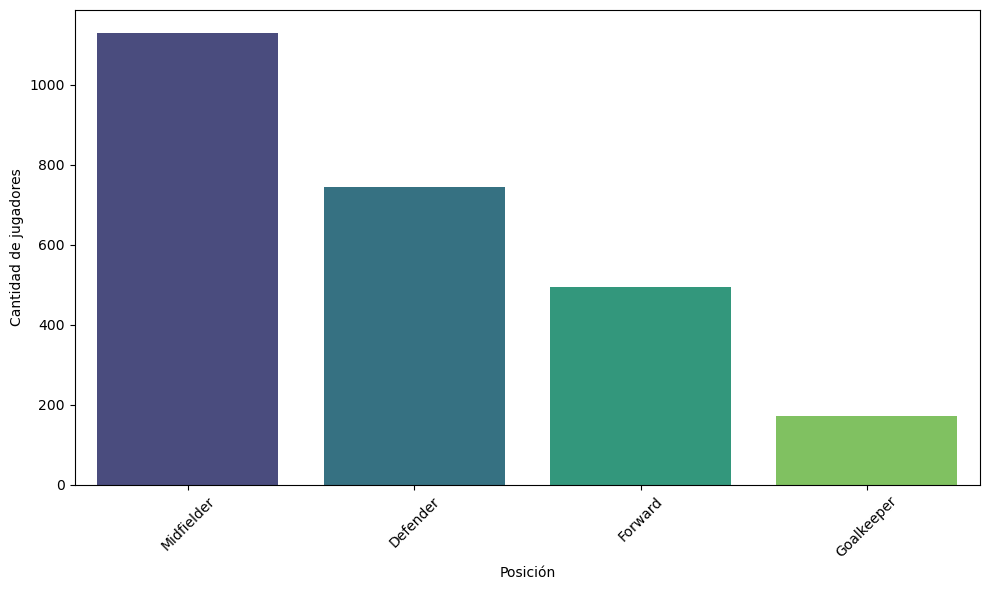

In [10]:
position_counts = df['core_position'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=position_counts.index, y=position_counts.values, palette="viridis")
plt.xlabel("Posición")
plt.ylabel("Cantidad de jugadores")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()